In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df.head()

,train_loss,train_accuracy,train_perplexity,learning_rate,len_train_ds,len_val_ds,batches_per_epoch,time_per_epoch,fwd_time_in_epoch,epoch,...,paramnorm_transformer.decoder.blocks.1.self_attn.Wo.weight,paramnorm_transformer.decoder.blocks.1.self_attn_norm.weight,paramnorm_transformer.decoder.blocks.1.self_attn_norm.bias,paramnorm_transformer.decoder.blocks.1.ffn.ffn.0.weight,paramnorm_transformer.decoder.blocks.1.ffn.ffn.2.weight,paramnorm_transformer.decoder.blocks.1.ffn_norm.weight,paramnorm_transformer.decoder.blocks.1.ffn_norm.bias,paramnorm_transformer.linear.weight,full_train_loss,full_train_acc
0,5.419975,0.0,225.873535,0.0000,470.0,8939.0,2.0,0.065536,0.008008,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,0.051147,0.999960,0.000295,0.051132,0.025460,0.999965,0.000294,0.051170,5.017161,0.0
2,5.151625,0.0,172.711868,0.0002,470.0,8939.0,2.0,0.119903,0.006053,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,...,0.051152,0.999854,0.000978,0.051143,0.025474,0.999967,0.000974,0.051157,4.201431,0.0
4,4.425521,0.0,83.556320,0.0004,470.0,8939.0,2.0,0.119197,0.006120,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\harog\AppData\Local\Temp\ipykernel_18772\1764196123.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["epoch"] = df_clean["epoch"].astype(int)


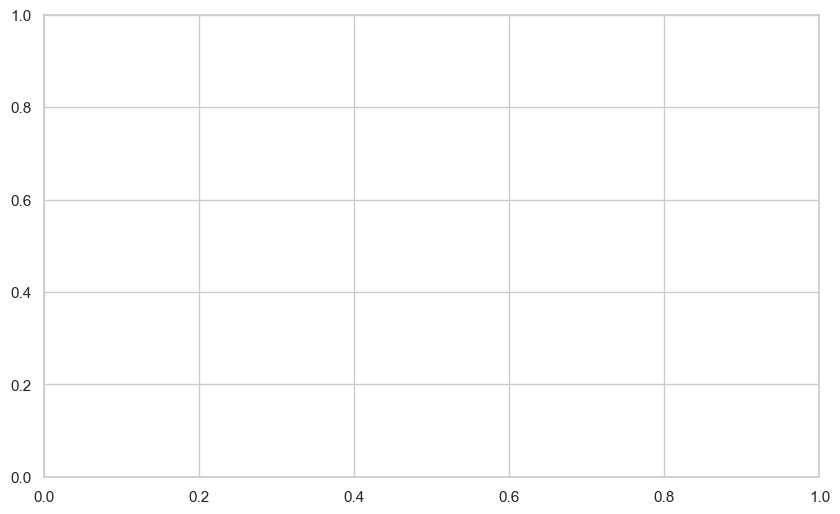

In [7]:
# Load metrics CSV file
df = pd.read_csv("data/metrics-50000-Epochs.csv")

# Drop rows with missing metrics
df_clean = df.dropna(subset=["epoch", "train_loss", "train_accuracy"])
df_clean["epoch"] = df_clean["epoch"].astype(int)

# Set style
sns.set(style="whitegrid")

# Create a new figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

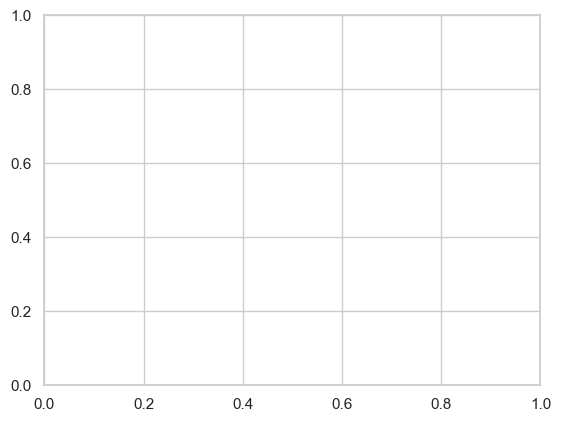

In [9]:
# Plot training loss
sns.lineplot(data=df_clean, x="epoch", y="train_loss", ax=ax1, color="red", label="Train Loss")
ax1.set_ylabel("Train Loss", color="red")
ax1.tick_params(axis="y", labelcolor="red")

# Create a second y-axis
ax2 = ax1.twinx()
sns.lineplot(data=df_clean, x="epoch", y="train_accuracy", ax=ax2, color="blue", label="Train Accuracy")
ax2.set_ylabel("Train Accuracy", color="blue")
ax2.tick_params(axis="y", labelcolor="blue")

# Final plot formatting
ax1.set_title("Training Loss and Accuracy Over Epochs")
ax1.set_xlabel("Epoch")
plt.tight_layout()
plt.grid(True)

# Show the plot
plt.show()

C:\Users\harog\AppData\Local\Temp\ipykernel_18772\3209555674.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["epoch"] = df_clean["epoch"].astype(int)


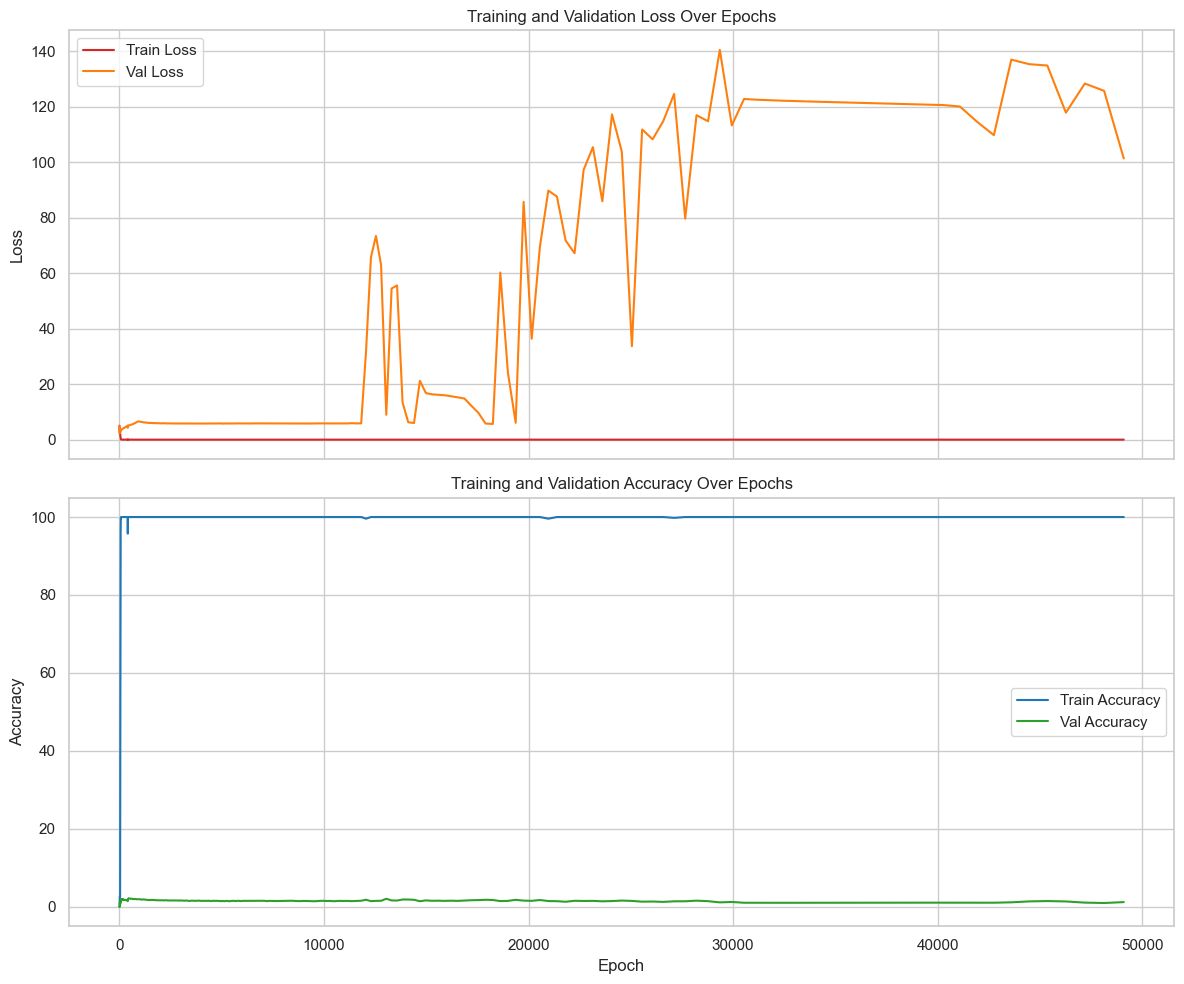

In [15]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the metrics CSV
df = pd.read_csv("data/metrics-50000-Epochs.csv")

# Drop rows with missing values in key metrics
df_clean = df.dropna(subset=["epoch", "full_train_loss", "full_train_acc", "val_loss", "val_accuracy"])
df_clean["epoch"] = df_clean["epoch"].astype(int)

# Set plot style
sns.set(style="whitegrid")

# Create subplots for loss and accuracy
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# --- Plot 1: Loss ---
sns.lineplot(data=df_clean, x="epoch", y="full_train_loss", ax=ax1, label="Train Loss", color="tab:red")
sns.lineplot(data=df_clean, x="epoch", y="val_loss", ax=ax1, label="Val Loss", color="tab:orange")
ax1.set_ylabel("Loss")
ax1.set_title("Training and Validation Loss Over Epochs")
ax1.legend()

# --- Plot 2: Accuracy ---
sns.lineplot(data=df_clean, x="epoch", y="full_train_acc", ax=ax2, label="Train Accuracy", color="tab:blue")
sns.lineplot(data=df_clean, x="epoch", y="val_accuracy", ax=ax2, label="Val Accuracy", color="tab:green")
ax2.set_ylabel("Accuracy")
ax2.set_xlabel("Epoch")
ax2.set_title("Training and Validation Accuracy Over Epochs")
ax2.legend()

# Layout adjustment
plt.tight_layout()
plt.show()

# Save figure (optional)
fig.savefig("training_vs_validation_metrics.png", dpi=300)

### Training vs Validation Performance (Epochs 0–50,000)

The plot above visualizes both **training and validation loss** (top) and **accuracy** (bottom) over 50,000 training steps.

-  **Training loss** rapidly drops to near zero and stays flat, while **training accuracy** remains near 100% — indicating that the model has fully memorized the training data.
-  **Validation loss**, on the other hand, remains high and fluctuates significantly. This instability suggests that the model is not generalizing and may be overfitting.
- 🟢 **Validation accuracy** stays close to zero for the entire duration, further confirming that the model hasn't "grokked" the underlying rule yet.

####  Interpretation
This pattern is typical in the early phases of grokking experiments. The model successfully memorizes the training set but **fails to generalize** to the validation set. Based on the Grokking paper, this "flatline" in validation performance may eventually flip — often after 1,000,000+ steps — if the right inductive biases (like weight decay) and sufficient training time are provided.

We may need to:
- Increase training steps (`max_steps=100000`)
- Adjust training data percentage (`train_data_pct=80 or 90`)
- Introduce regularization (`weight_decay > 0`)  
to observe the grokking behavior emerge in future runs.

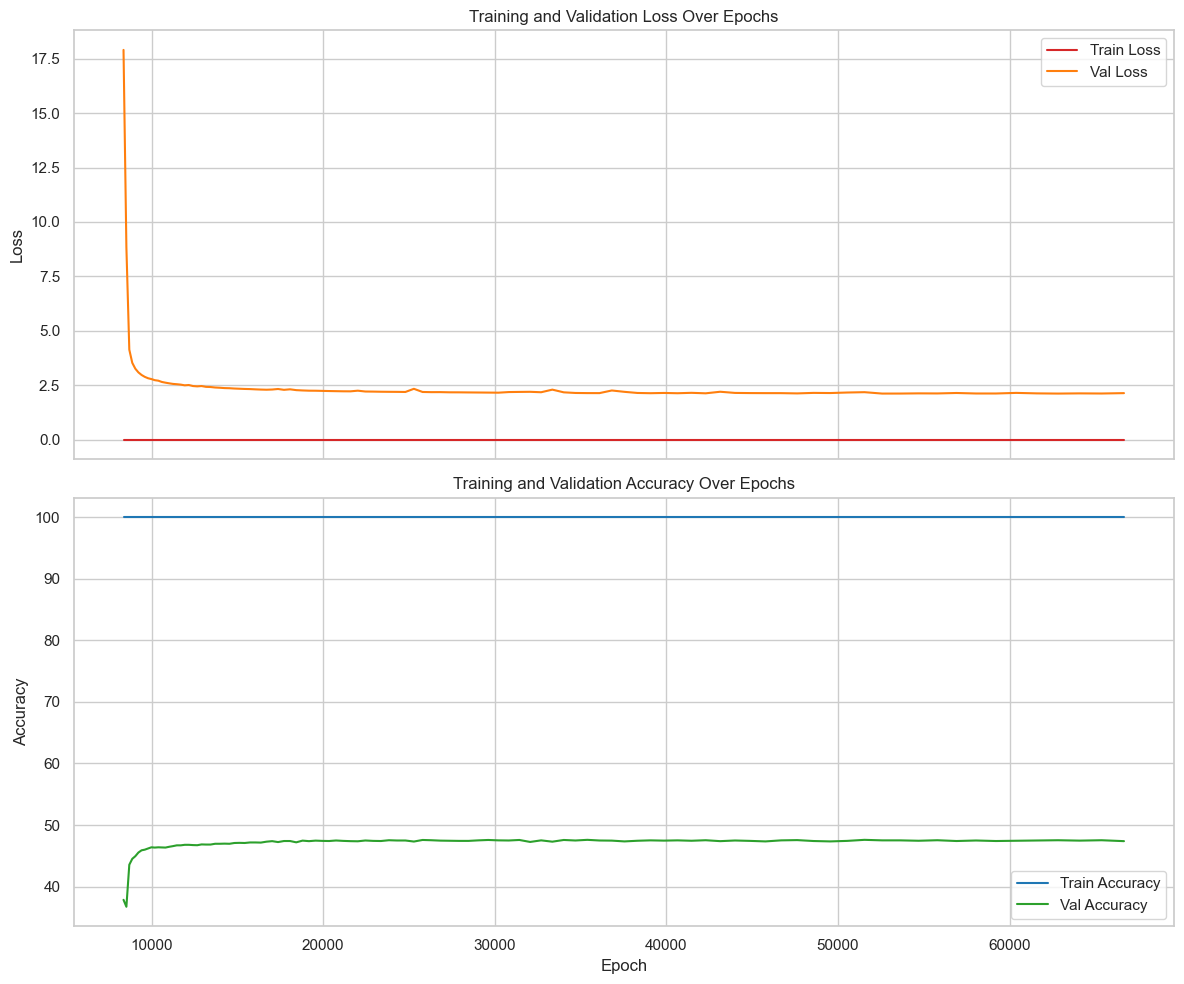

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the metrics CSV
df = pd.read_csv("data/metrics 6500.csv")

# Drop rows with missing values in key metrics
df_clean = df.dropna(subset=["epoch", "full_train_loss", "full_train_acc", "val_loss", "val_accuracy"])
df_clean["epoch"] = df_clean["epoch"].astype(int)

# Set plot style
sns.set(style="whitegrid")

# Create subplots for loss and accuracy
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# --- Plot 1: Loss ---
sns.lineplot(data=df_clean, x="epoch", y="full_train_loss", ax=ax1, label="Train Loss", color="tab:red")
sns.lineplot(data=df_clean, x="epoch", y="val_loss", ax=ax1, label="Val Loss", color="tab:orange")
ax1.set_ylabel("Loss")
ax1.set_title("Training and Validation Loss Over Epochs")
ax1.legend()

# --- Plot 2: Accuracy ---
sns.lineplot(data=df_clean, x="epoch", y="full_train_acc", ax=ax2, label="Train Accuracy", color="tab:blue")
sns.lineplot(data=df_clean, x="epoch", y="val_accuracy", ax=ax2, label="Val Accuracy", color="tab:green")
ax2.set_ylabel("Accuracy")
ax2.set_xlabel("Epoch")
ax2.set_title("Training and Validation Accuracy Over Epochs")
ax2.legend()

# Layout adjustment
plt.tight_layout()
plt.show()

# Save figure (optional)
fig.savefig("training_vs_validation_metrics.png", dpi=300)

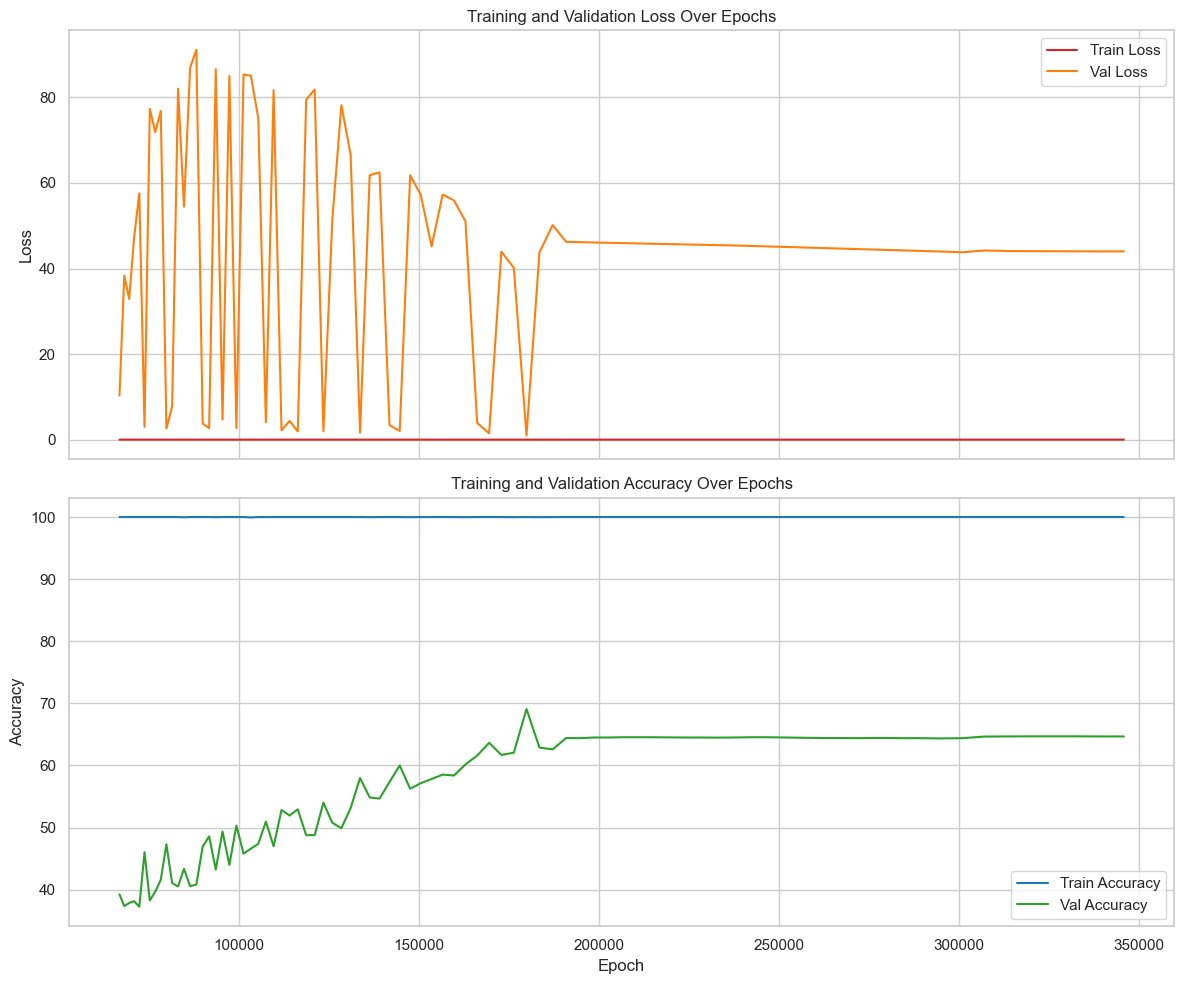

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the metrics CSV
df = pd.read_csv("data/metrics 352,000.csv")

# Drop rows with missing values in key metrics
df_clean = df.dropna(subset=["epoch", "full_train_loss", "full_train_acc", "val_loss", "val_accuracy"])
df_clean["epoch"] = df_clean["epoch"].astype(int)

# Set plot style
sns.set(style="whitegrid")

# Create subplots for loss and accuracy
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# --- Plot 1: Loss ---
sns.lineplot(data=df_clean, x="epoch", y="full_train_loss", ax=ax1, label="Train Loss", color="tab:red")
sns.lineplot(data=df_clean, x="epoch", y="val_loss", ax=ax1, label="Val Loss", color="tab:orange")
ax1.set_ylabel("Loss")
ax1.set_title("Training and Validation Loss Over Epochs")
ax1.legend()

# --- Plot 2: Accuracy ---
sns.lineplot(data=df_clean, x="epoch", y="full_train_acc", ax=ax2, label="Train Accuracy", color="tab:blue")
sns.lineplot(data=df_clean, x="epoch", y="val_accuracy", ax=ax2, label="Val Accuracy", color="tab:green")
ax2.set_ylabel("Accuracy")
ax2.set_xlabel("Epoch")
ax2.set_title("Training and Validation Accuracy Over Epochs")
ax2.legend()

# Layout adjustment
plt.tight_layout()
plt.show()

# Save figure (optional)
fig.savefig("training_vs_validation_metrics.png", dpi=300)

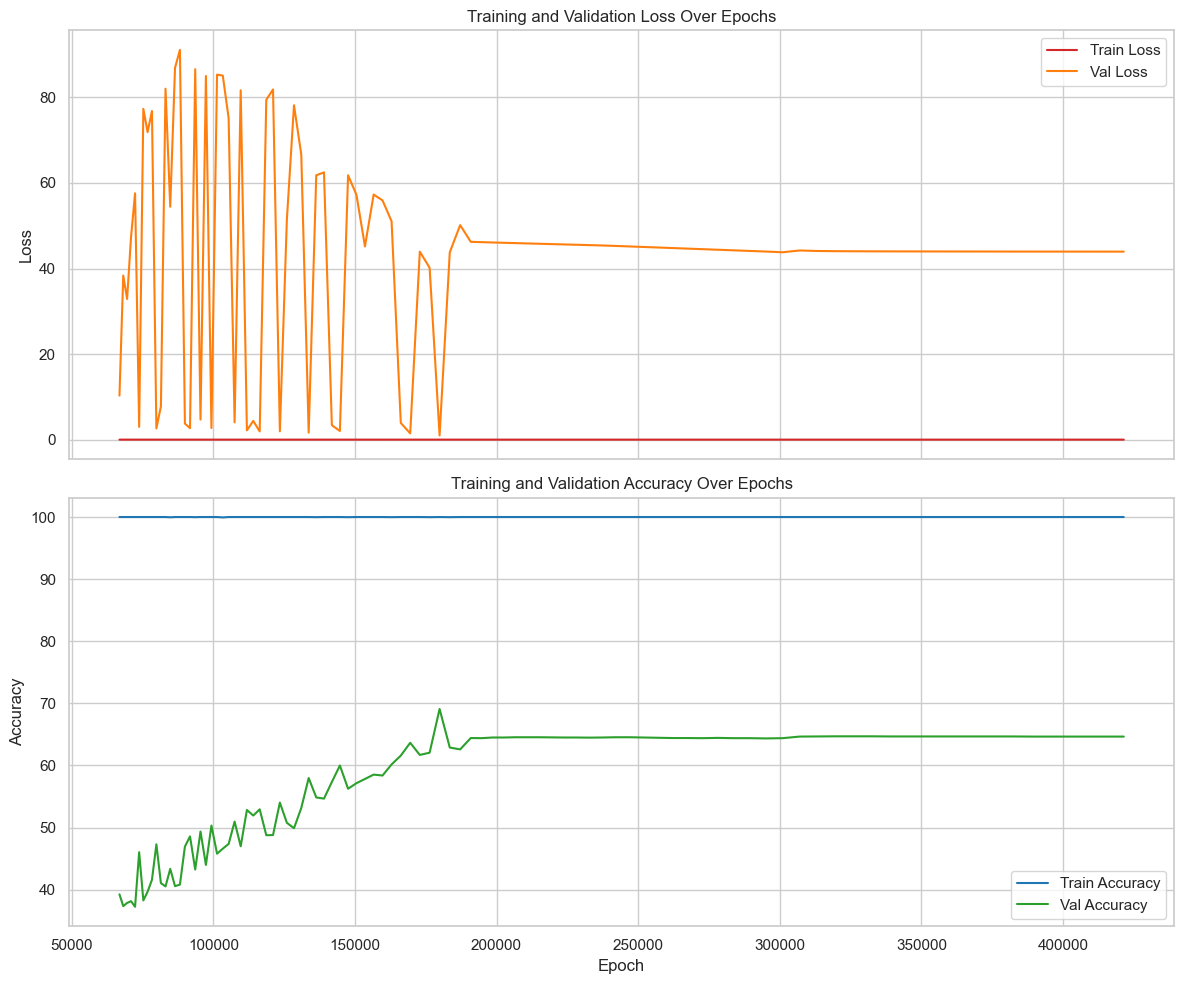

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the metrics CSV
df = pd.read_csv("data/metrics 428000.csv")

# Drop rows with missing values in key metrics
df_clean = df.dropna(subset=["epoch", "full_train_loss", "full_train_acc", "val_loss", "val_accuracy"])
df_clean["epoch"] = df_clean["epoch"].astype(int)

# Set plot style
sns.set(style="whitegrid")

# Create subplots for loss and accuracy
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# --- Plot 1: Loss ---
sns.lineplot(data=df_clean, x="epoch", y="full_train_loss", ax=ax1, label="Train Loss", color="tab:red")
sns.lineplot(data=df_clean, x="epoch", y="val_loss", ax=ax1, label="Val Loss", color="tab:orange")
ax1.set_ylabel("Loss")
ax1.set_title("Training and Validation Loss Over Epochs")
ax1.legend()

# --- Plot 2: Accuracy ---
sns.lineplot(data=df_clean, x="epoch", y="full_train_acc", ax=ax2, label="Train Accuracy", color="tab:blue")
sns.lineplot(data=df_clean, x="epoch", y="val_accuracy", ax=ax2, label="Val Accuracy", color="tab:green")
ax2.set_ylabel("Accuracy")
ax2.set_xlabel("Epoch")
ax2.set_title("Training and Validation Accuracy Over Epochs")
ax2.legend()

# Layout adjustment
plt.tight_layout()
plt.show()

# Save figure (optional)
fig.savefig("training_vs_validation_metrics.png", dpi=300)